In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import magnification
import testdata
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp1d

In [3]:
plt.rcParams['font.family'] = 'serif'# 'sans-serif'
plt.rcParams['font.serif'] = "STIXGeneral"
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rc("text",usetex=True)
plt.rc("font",family="serif")
plt.rc("font",serif="STIXGeneral")

In [4]:
mag = magnification.mag_fft.magnification(profile_names=['disk', 'limb1', 'limb2'])

0.1
CPU times: user 3.1 ms, sys: 471 µs, total: 3.57 ms
Wall time: 3.54 ms
CPU times: user 1.66 s, sys: 1.61 ms, total: 1.66 s
Wall time: 1.66 s
CPU times: user 95 ms, sys: 0 ns, total: 95 ms
Wall time: 95 ms
CPU times: user 4.61 ms, sys: 0 ns, total: 4.61 ms
Wall time: 4.7 ms
1.0
CPU times: user 3.16 ms, sys: 249 µs, total: 3.41 ms
Wall time: 3.38 ms
CPU times: user 2.86 s, sys: 861 µs, total: 2.86 s
Wall time: 2.86 s
CPU times: user 93 ms, sys: 52 µs, total: 93.1 ms
Wall time: 93 ms
CPU times: user 3.56 ms, sys: 30.7 ms, total: 34.2 ms
Wall time: 44.7 ms
10.0
CPU times: user 3.33 ms, sys: 252 µs, total: 3.58 ms
Wall time: 3.56 ms
CPU times: user 1.68 s, sys: 0 ns, total: 1.68 s
Wall time: 1.68 s
CPU times: user 91.4 ms, sys: 0 ns, total: 91.4 ms
Wall time: 91.3 ms
CPU times: user 4.39 ms, sys: 7.03 ms, total: 11.4 ms
Wall time: 14.2 ms


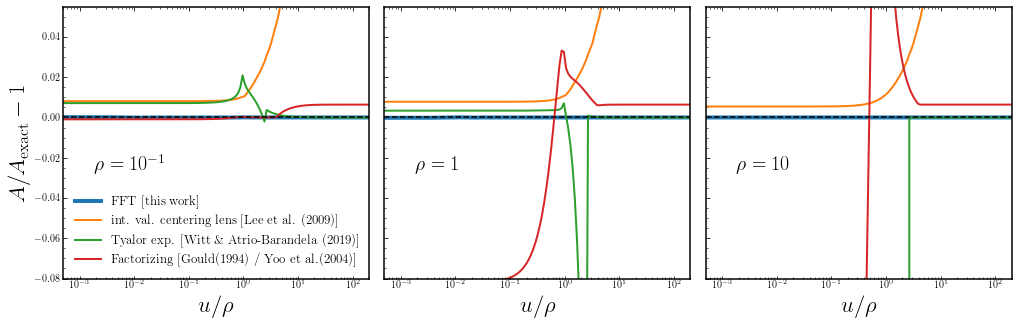

In [5]:
fig, axes = plt.subplots(1,3, figsize=(17, 5))
plt.subplots_adjust(wspace=0.05)

for i in range(3):
    ax = axes[i]
    r = ['1e-1', '1', '10'][i]
    text = [r'$\rho=10^{-1}$', r'$\rho=1$', r'$\rho=10$'][i]
    name = 'limb'
    
    u, rho, a_true = testdata.get_test_data('testdata/%s_%s.txt'%(name, r))
    print(rho)
    %time a_fft = mag.A_limb1(u.copy(), rho)
    %time a_lee = magnification.mag_lee.A_limb(u.copy(), rho, n1=200, n2=200, order=1)
    %time a_wb  = magnification.mag_wb.A_limb(u.copy(), rho)
    %time a_g   = magnification.mag_yoo.A_limb(u.copy(), rho)
    ax.set_xscale('log')
    ax.plot(u/rho, a_fft/a_true-1, lw=4, label='FFT [this work]')
    ax.plot(u/rho, a_lee/a_true-1, lw=2, label='int. val. centering lens [Lee et al. (2009)]')
    ax.plot(u/rho, a_wb /a_true-1, lw=2, label='Tyalor exp. [Witt \& Atrio-Barandela (2019)]')
    ax.plot(u/rho, a_g  /a_true-1, lw=2, label='Factorizing [Gould(1994) / Yoo et al.(2004)]')
    ax.axhline(0.0, color='k', linestyle='--')
    #ax.set_ylim(-0.023, 0.055)
    ax.set_ylim(-0.08, 0.055)
    ax.set_xlim(5e-4, 2e2)
    ax.set_xlabel(r'$u/\rho$', fontsize=23)
    ax.text(0.1, 0.4, text, fontsize=20, transform=ax.transAxes)
    if i>0:
        plt.setp(axes[i].get_yticklabels(), visible=False)

axes[0].legend(frameon=False, fontsize=13)
axes[0].set_ylabel(r'$A/A_{\rm exact}-1$', fontsize=23)
plt.show()